<center><h1>Telecom Churn Prediction</h1></center>
    <img src="cover_tree.jpeg" style="width:1000px;height:500px">

Table of contents:

1. [Import relevant libraries](#Libraries)
2. [Load files](#Load)
3. [Data Exploration](#Exploration)
4. [EDA(Exploratory Data Analysis)](#EDA)
5. [Preprocessing Data](#Cleaning)
6. [Splitting the Data](#Splitting)
7. [Model training](#Model)
8. [Test set predictions](#Predictions)

<a name = "Libraries"></a>
## 1. Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score,classification_report,confusion_matrix,accuracy_score,roc_curve,auc,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as mtick
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

%matplotlib inline

<a name = "Load"></a>
## 2. Load files

In [2]:
df=pd.read_excel("Telco Churn dataset.xlsx")

In [3]:
data=pd.DataFrame(df)

In [4]:
data=data.set_index("customerID")

In [5]:
data.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3333.000000,0.110111,0.313075,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,3333.000000,28.001500,23.262239,0.000000,7.000000,23.000000,48.000000,72.000000
NumbervMailMessages,3333.000000,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
TotalDayMinutes,3333.000000,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
TotalDayCalls,3333.000000,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000
TotalEveMinutes,3333.000000,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000
TotalEveCalls,3333.000000,100.114311,19.922625,0.000000,87.000000,100.000000,114.000000,170.000000
TotalNightMinutes,3333.000000,200.872037,50.573847,23.200000,167.000000,201.200000,235.300000,395.000000
TotalNightCalls,3333.000000,100.107711,19.568609,33.000000,87.000000,100.000000,113.000000,175.000000
TotalIntlMinutes,3333.000000,10.237294,2.791840,0.000000,8.500000,10.300000,12.100000,20.000000


<a name = "Exploration"></a>
## 3. Data Exploration

In [6]:
#Checking the data distribution
data.head()

,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalRevenue,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,241.4,107,204.8,106,15.5,4,0,354,593.3,No
0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,131.7,94,169.5,106,10.3,9,5,326,280.85,Yes
0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,...,178.6,102,126.8,82,8.0,4,2,324,571.45,No
0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,...,262.2,64,130.0,92,8.8,4,0,228,7904.25,No
0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,...,195.7,86,236.5,137,12.0,2,1,294,340.35,No


In [7]:
data.shape

(3333, 32)

In [8]:
data.columns.values

array(['gender', 'SeniorCitizen', 'MaritalStatus', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'InternationalPlan',
       'VoiceMailPlan', 'NumbervMailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes',
       'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall',
       'TotalRevenue', 'Churn'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0002-ORFBO to 9993-LHIEB
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                3333 non-null   object 
 1   SeniorCitizen         3333 non-null   int64  
 2   MaritalStatus         3333 non-null   object 
 3   Dependents            3333 non-null   object 
 4   tenure                3333 non-null   int64  
 5   PhoneService          3333 non-null   object 
 6   MultipleLines         3333 non-null   object 
 7   InternetService       3333 non-null   object 
 8   OnlineSecurity        3333 non-null   object 
 9   OnlineBackup          3333 non-null   object 
 10  DeviceProtection      3333 non-null   object 
 11  TechSupport           3333 non-null   object 
 12  StreamingTV           3333 non-null   object 
 13  StreamingMovies       3333 non-null   object 
 14  Contract              3333 non-null   object 
 15  PaperlessBi

### Missing Value Treatement

In [10]:
data.isna().sum()

gender                  0
SeniorCitizen           0
MaritalStatus           0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
InternationalPlan       0
VoiceMailPlan           0
NumbervMailMessages     0
TotalDayMinutes         0
TotalDayCalls           0
TotalEveMinutes         0
TotalEveCalls           0
TotalNightMinutes       0
TotalNightCalls         0
TotalIntlMinutes        0
TotalIntlCalls          0
CustomerServiceCalls    0
TotalCall               0
TotalRevenue            0
Churn                   0
dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


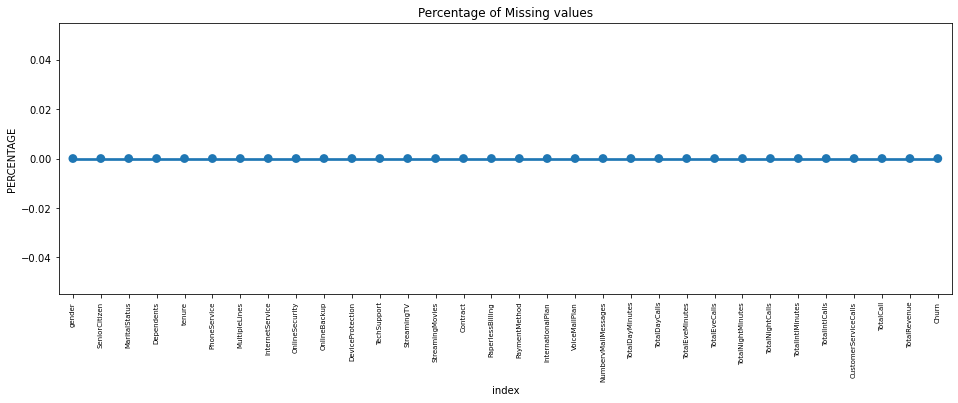

In [11]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt. figure(figsize=(16,5))

ax = sns.pointplot('index',0, data=missing)
plt.xticks (rotation=90, fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel ("PERCENTAGE")
plt.show()

### Handeling Duplications 

In [12]:
data.duplicated().value_counts()

False    3333
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.duplicated().any()

False

In [15]:
data

,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalRevenue,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,241.4,107,204.8,106,15.5,4,0,354,593.3,No
0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,131.7,94,169.5,106,10.3,9,5,326,280.85,Yes
0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,...,178.6,102,126.8,82,8.0,4,2,324,571.45,No
0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,...,262.2,64,130.0,92,8.8,4,0,228,7904.25,No
0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,...,195.7,86,236.5,137,12.0,2,1,294,340.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979-RGMZT,Female,0,No,No,7,Yes,No,Fiber optic,No,Yes,...,211.7,75,194.9,76,9.3,2,1,296,633.45,No
9986-BONCE,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,...,221.6,70,190.6,75,11.6,3,4,264,85.5,Yes
9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,No,...,168.1,113,239.8,145,12.0,6,1,349,742.9,No


<a name = "EDA"></a>
## 4. EDA(Exploratory Data Analysis)


In [16]:
object_columns = data.select_dtypes(include=['object']).columns

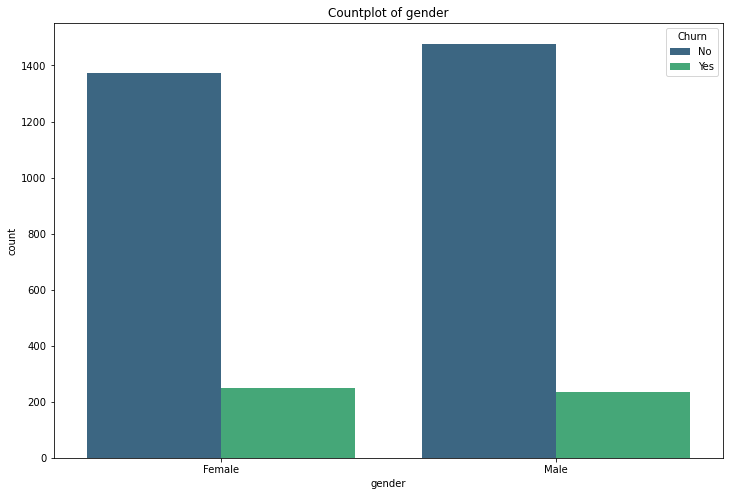

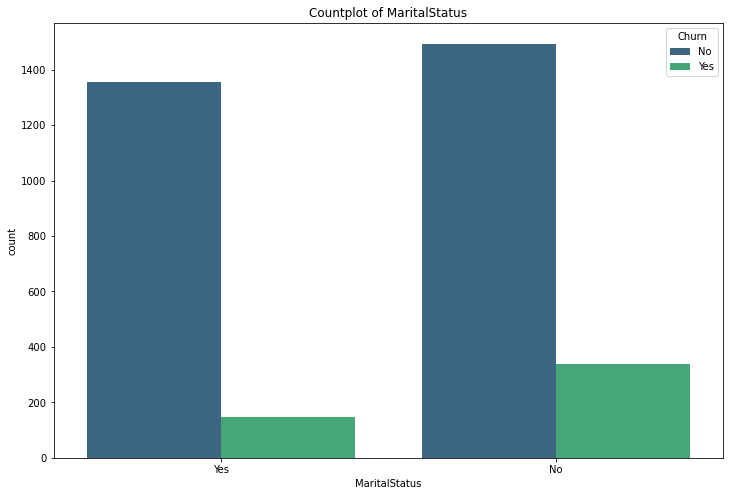

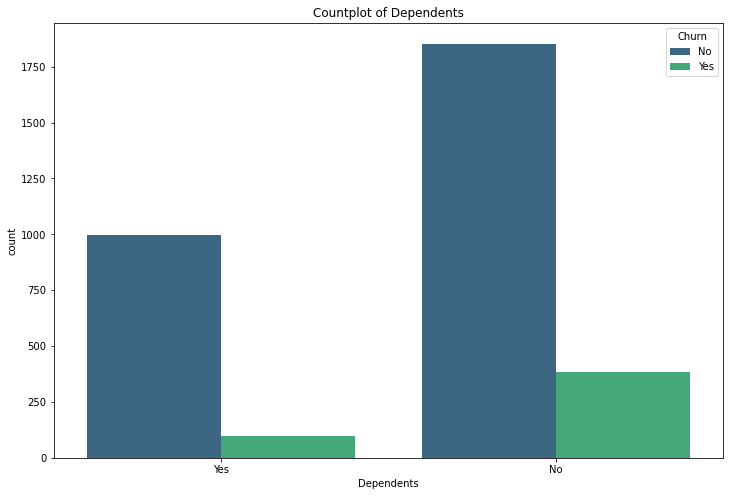

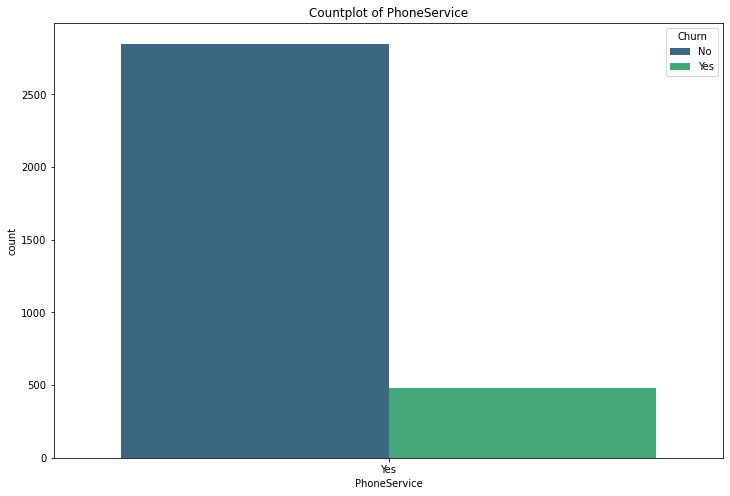

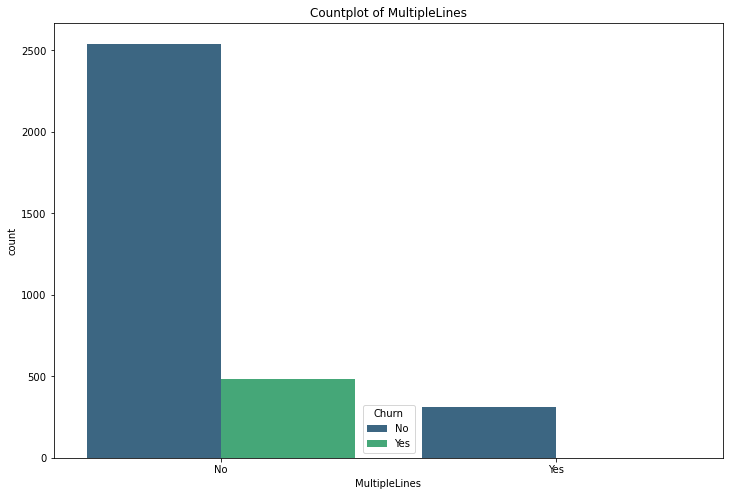

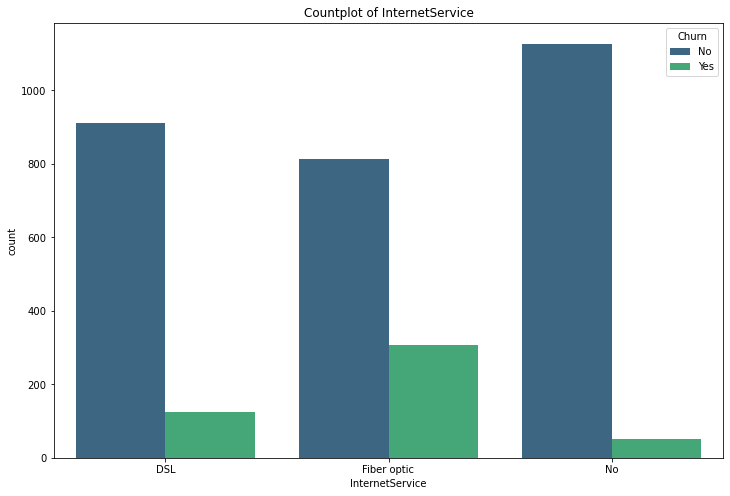

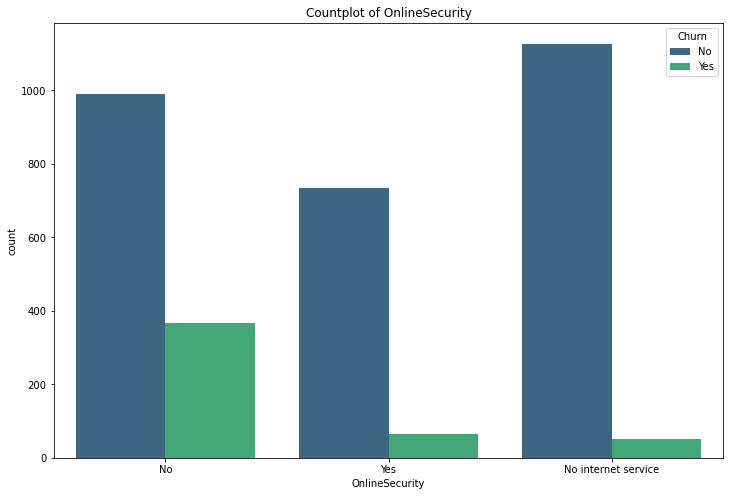

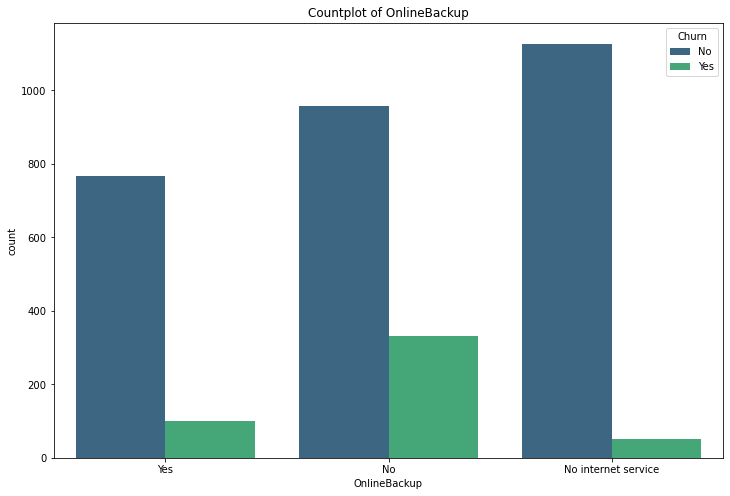

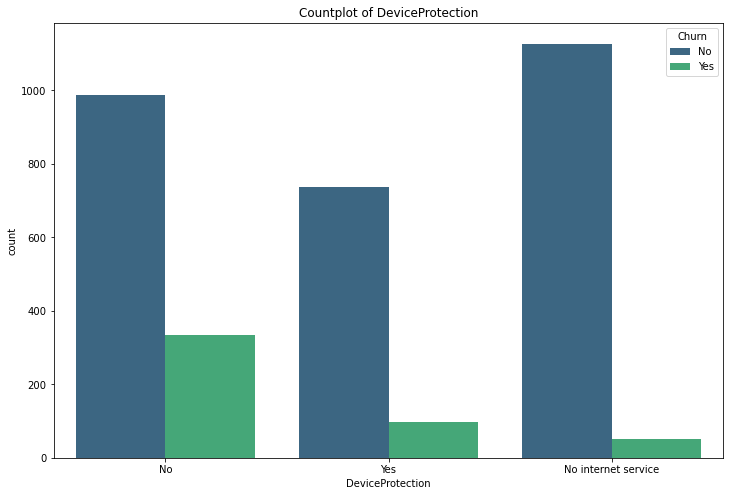

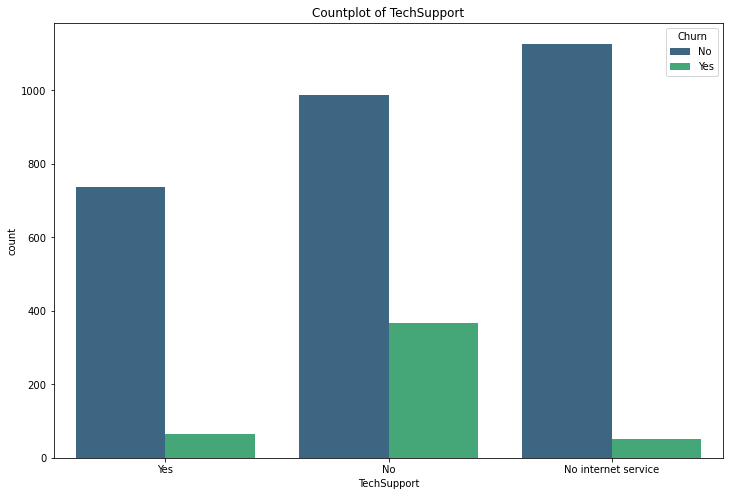

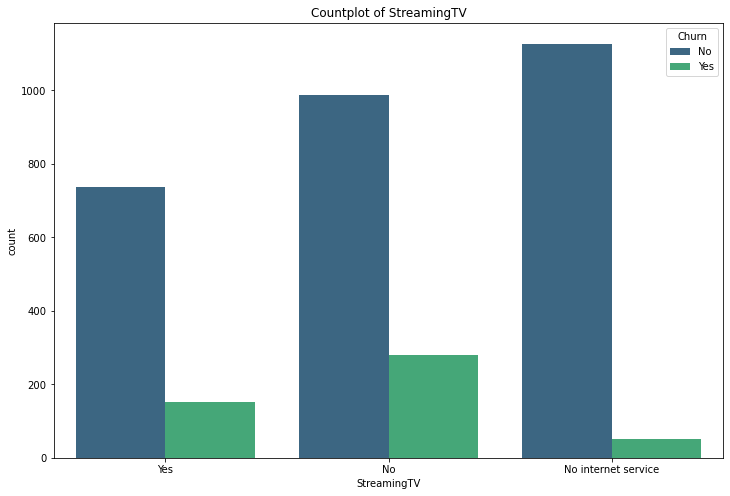

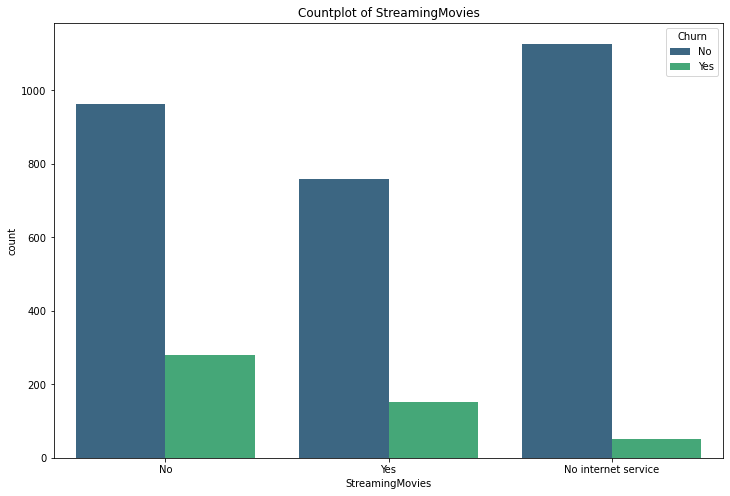

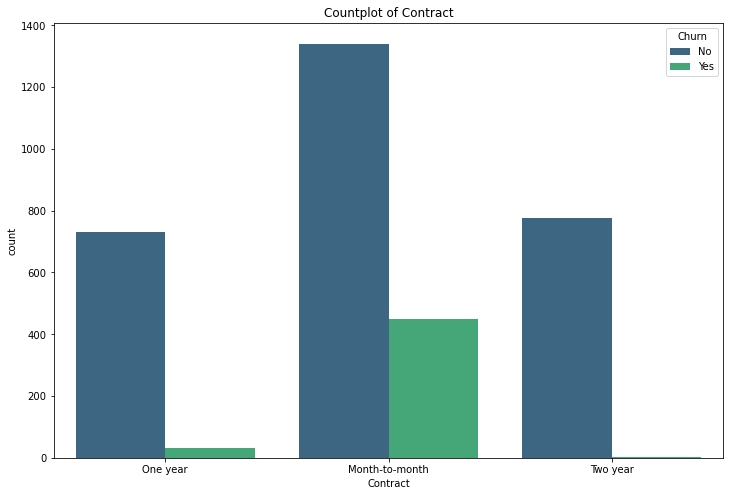

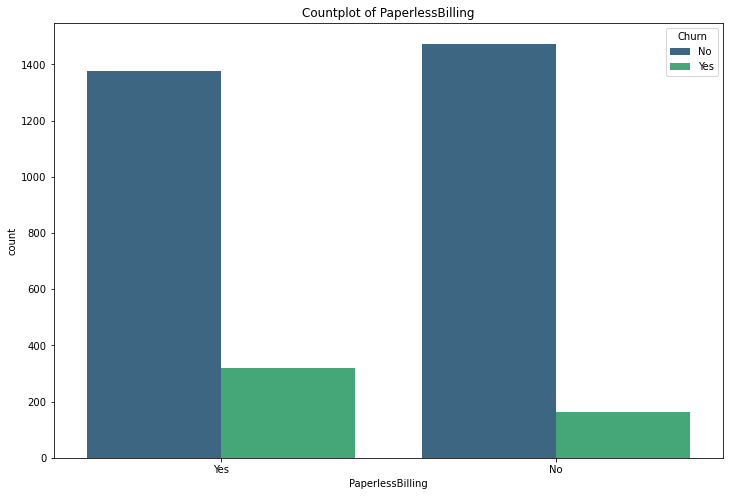

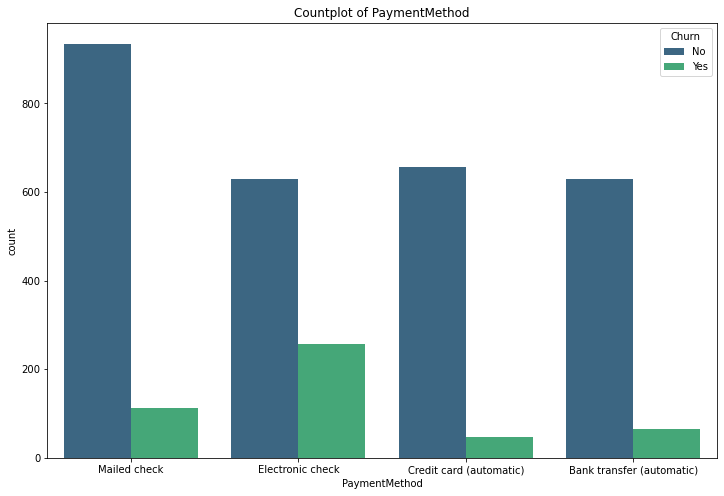

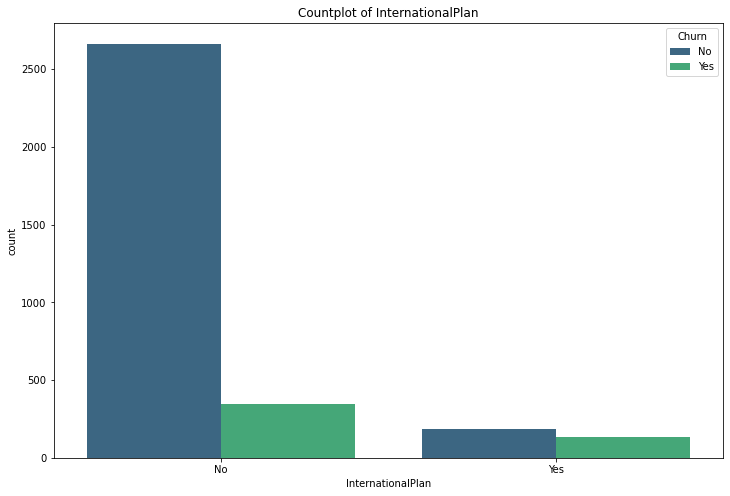

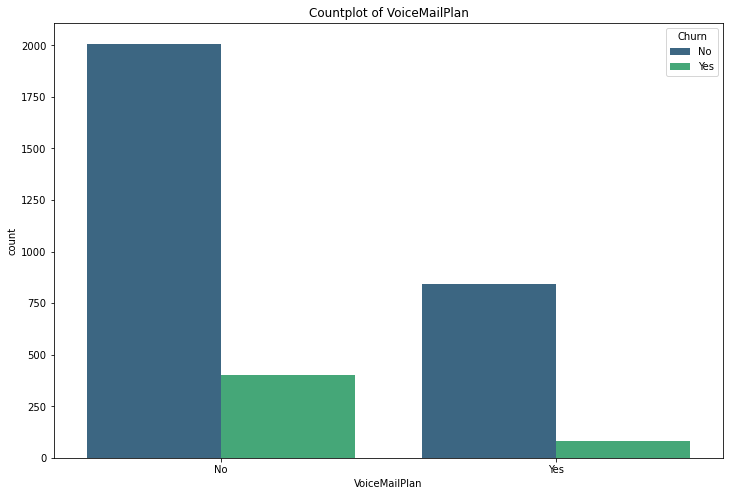

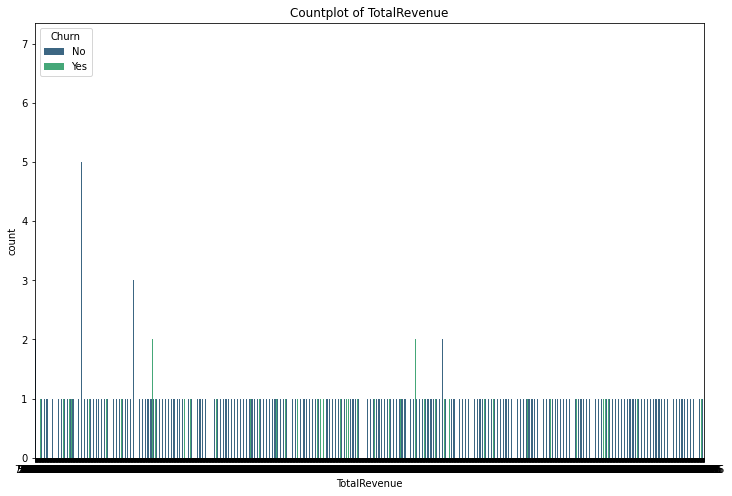

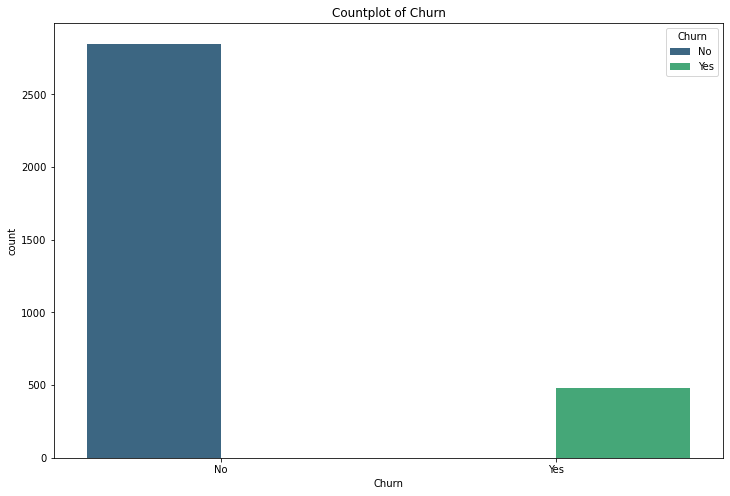

In [17]:
for column in object_columns:
    plt.figure(figsize=(12,8))
    sns.countplot(data=data, x=column,hue='Churn',palette='viridis')
    plt.title(f'Countplot of {column}')
    plt.show()

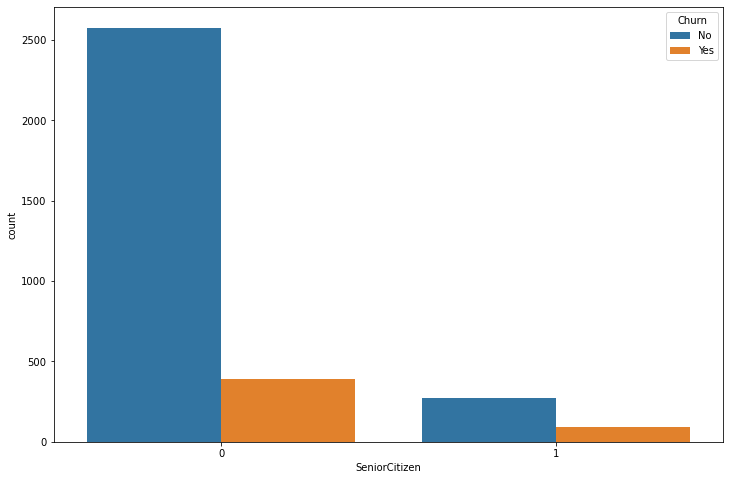

In [18]:
fig = plt.figure(figsize = (12,8))
sns.countplot(x = 'SeniorCitizen', data = data,hue='Churn')
plt.show()

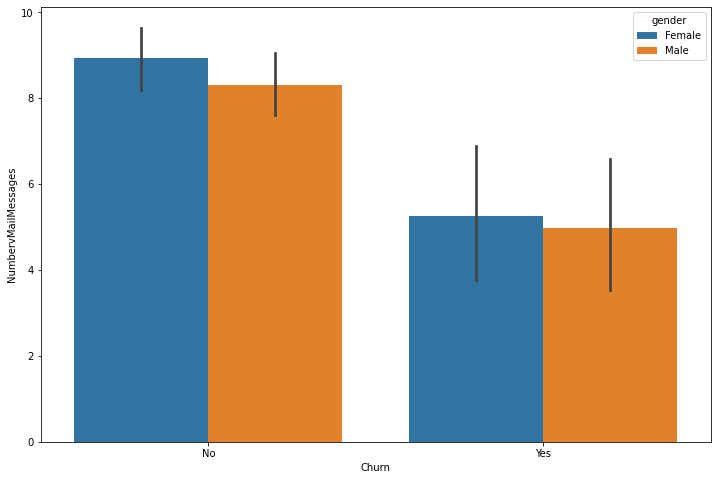

In [19]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'NumbervMailMessages', data = data,hue='gender')
plt.show()

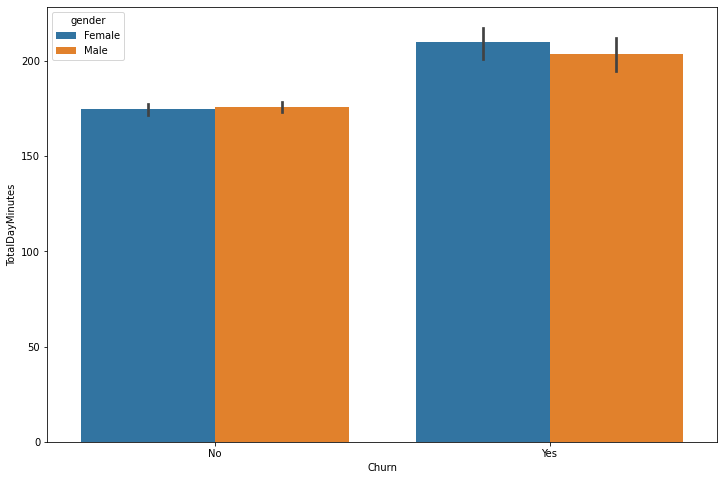

In [20]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'TotalDayMinutes', data = data,hue='gender')
plt.show()

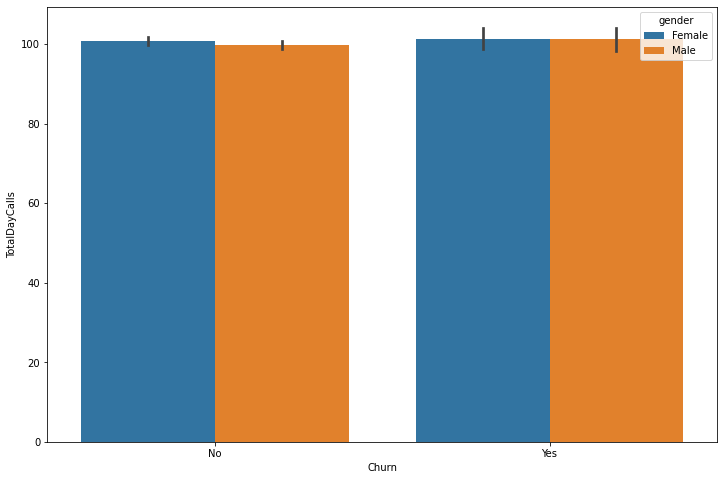

In [21]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'TotalDayCalls', data = data,hue='gender')
plt.show()         

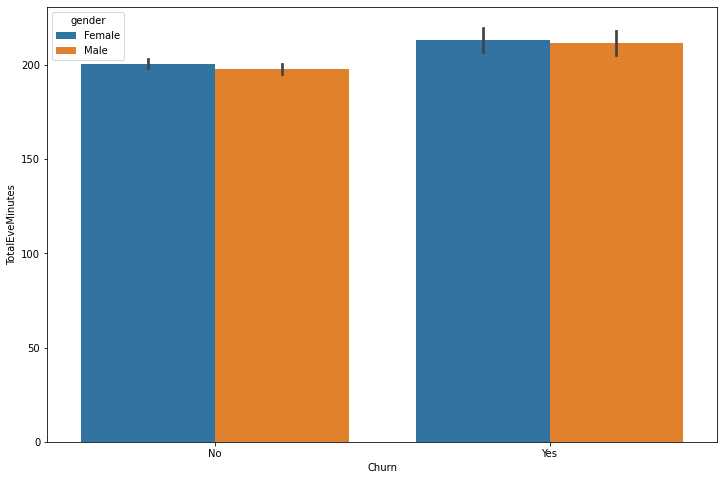

In [22]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'TotalEveMinutes', data = data,hue='gender')
plt.show()

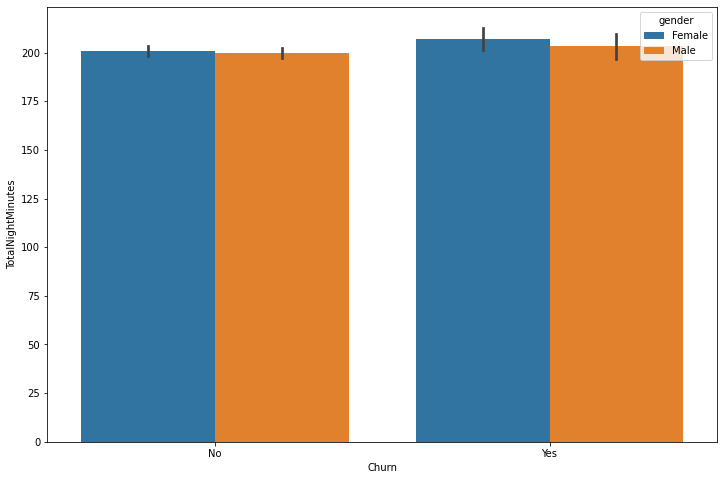

In [23]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'TotalNightMinutes', data = data,hue='gender')
plt.show()

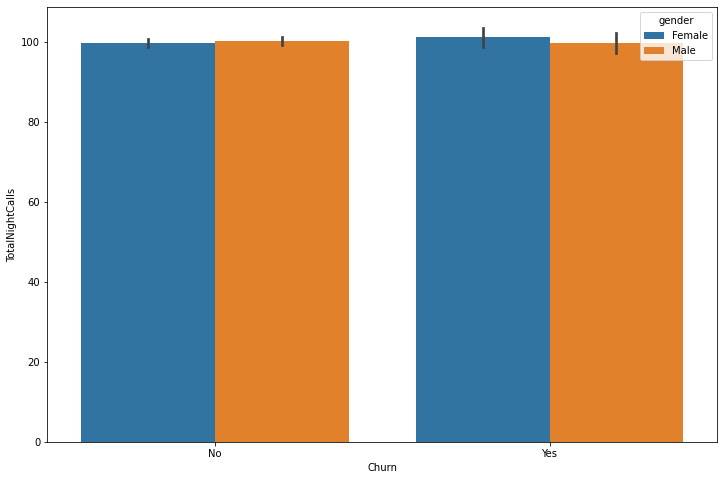

In [24]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'TotalNightCalls', data = data,hue='gender')
plt.show()

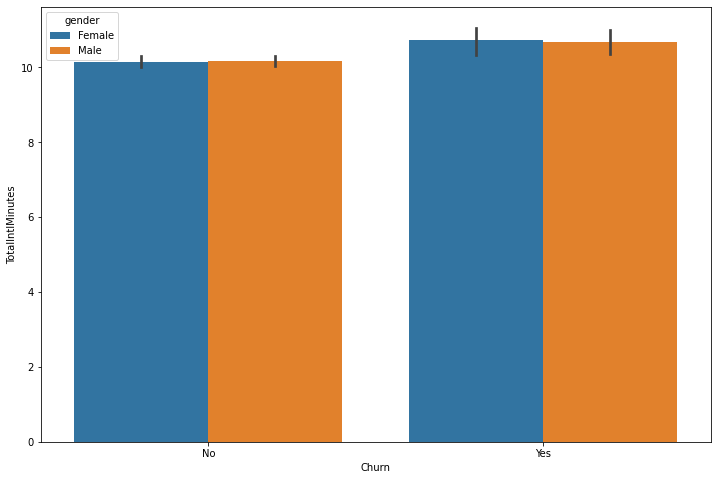

In [25]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'TotalIntlMinutes', data = data,hue='gender')
plt.show()

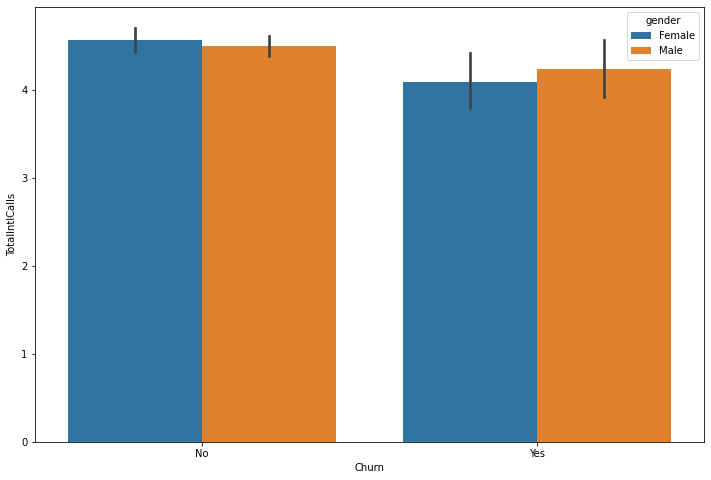

In [26]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'TotalIntlCalls', data = data,hue='gender')
plt.show()

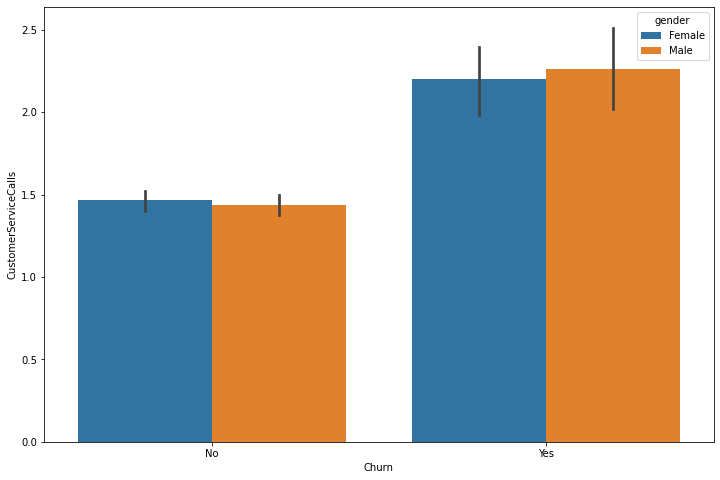

In [27]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'CustomerServiceCalls', data = data,hue='gender')
plt.show()

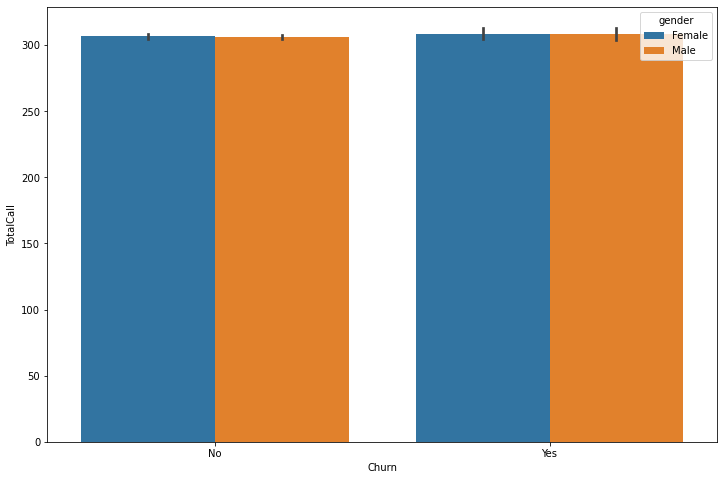

In [28]:
fig = plt.figure(figsize = (12,8))
sns.barplot(x = 'Churn', y = 'TotalCall', data = data,hue='gender')
plt.show()

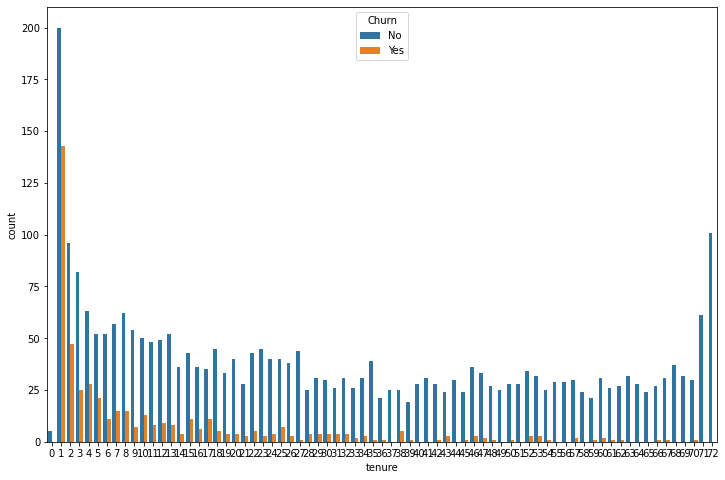

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x='tenure',data=data,hue='Churn')
plt.show()

### I'll divide customers into bins based on tenure for better visualization 

In [30]:
data.tenure.max() 

72

In [31]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1,72, 12)]

data['tenureg'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [32]:
data.tenureg.value_counts()

1 - 12     1207
13 - 24     544
61 - 72     461
25 - 36     420
49 - 60     349
37 - 48     347
Name: tenureg, dtype: int64

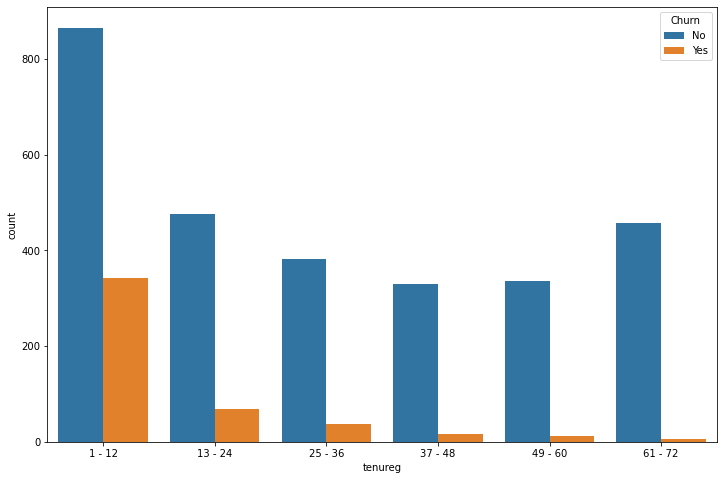

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x='tenureg',data=data,hue='Churn')
plt.show()

In [34]:
data.drop(columns=['tenure'],axis=1,inplace=True)

In [35]:
data.head()

,gender,SeniorCitizen,MaritalStatus,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalRevenue,Churn,tenureg
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,...,107,204.8,106,15.5,4,0,354,593.3,No,1 - 12
0004-TLHLJ,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,...,94,169.5,106,10.3,9,5,326,280.85,Yes,1 - 12
0013-MHZWF,Female,0,No,Yes,Yes,No,DSL,No,No,No,...,102,126.8,82,8.0,4,2,324,571.45,No,1 - 12
0013-SMEOE,Female,1,Yes,No,Yes,No,Fiber optic,Yes,Yes,Yes,...,64,130.0,92,8.8,4,0,228,7904.25,No,61 - 72
0015-UOCOJ,Female,1,No,No,Yes,No,DSL,Yes,No,No,...,86,236.5,137,12.0,2,1,294,340.35,No,1 - 12


In [36]:
data.head()

,gender,SeniorCitizen,MaritalStatus,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalRevenue,Churn,tenureg
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,...,107,204.8,106,15.5,4,0,354,593.3,No,1 - 12
0004-TLHLJ,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,...,94,169.5,106,10.3,9,5,326,280.85,Yes,1 - 12
0013-MHZWF,Female,0,No,Yes,Yes,No,DSL,No,No,No,...,102,126.8,82,8.0,4,2,324,571.45,No,1 - 12
0013-SMEOE,Female,1,Yes,No,Yes,No,Fiber optic,Yes,Yes,Yes,...,64,130.0,92,8.8,4,0,228,7904.25,No,61 - 72
0015-UOCOJ,Female,1,No,No,Yes,No,DSL,Yes,No,No,...,86,236.5,137,12.0,2,1,294,340.35,No,1 - 12


<a name = "Cleaning"></a>
## 5. Preprocessing Data

### Handeling Categorical Attributes

In [37]:
la=LabelEncoder()
data['Churn']=la.fit_transform(data['Churn'])

In [38]:
data=pd.get_dummies(data,columns=['tenureg'])

In [39]:
data['gender']=la.fit_transform(data['gender'])

In [40]:
data['MaritalStatus']=la.fit_transform(data['MaritalStatus'])

In [41]:
data['Dependents']=la.fit_transform(data['Dependents'])

In [42]:
data['PhoneService']=la.fit_transform(data['PhoneService'])

In [43]:
data['MultipleLines']=la.fit_transform(data['MultipleLines'])

In [44]:
data['InternetService']=la.fit_transform(data['InternetService'])

In [45]:
data['OnlineSecurity']=la.fit_transform(data['OnlineSecurity'])

In [46]:
data['OnlineBackup']=la.fit_transform(data['OnlineBackup'])

In [47]:
data['DeviceProtection']=la.fit_transform(data['DeviceProtection'])

In [48]:
data['TechSupport']=la.fit_transform(data['TechSupport'])

In [49]:
data['StreamingTV']=la.fit_transform(data['StreamingTV'])

In [50]:
data['StreamingMovies']=la.fit_transform(data['StreamingMovies'])

In [51]:
data['Contract']=la.fit_transform(data['Contract'])

In [52]:
data['PaperlessBilling']=la.fit_transform(data['PaperlessBilling'])

In [53]:
data['PaymentMethod']=la.fit_transform(data['PaymentMethod'])

In [54]:
data['InternationalPlan']=la.fit_transform(data['InternationalPlan'])

In [55]:
data['VoiceMailPlan']=la.fit_transform(data['VoiceMailPlan'])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0002-ORFBO to 9993-LHIEB
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                3333 non-null   int32  
 1   SeniorCitizen         3333 non-null   int64  
 2   MaritalStatus         3333 non-null   int32  
 3   Dependents            3333 non-null   int32  
 4   PhoneService          3333 non-null   int32  
 5   MultipleLines         3333 non-null   int32  
 6   InternetService       3333 non-null   int32  
 7   OnlineSecurity        3333 non-null   int32  
 8   OnlineBackup          3333 non-null   int32  
 9   DeviceProtection      3333 non-null   int32  
 10  TechSupport           3333 non-null   int32  
 11  StreamingTV           3333 non-null   int32  
 12  StreamingMovies       3333 non-null   int32  
 13  Contract              3333 non-null   int32  
 14  PaperlessBilling      3333 non-null   int32  
 15  PaymentMeth

In [57]:
data.head()

,gender,SeniorCitizen,MaritalStatus,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,CustomerServiceCalls,TotalCall,TotalRevenue,Churn,tenureg_1 - 12,tenureg_13 - 24,tenureg_25 - 36,tenureg_37 - 48,tenureg_49 - 60,tenureg_61 - 72
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,0,0,0,0,2,0,...,0,354,593.3,0,1,0,0,0,0,0
0004-TLHLJ,1,0,0,0,0,0,1,0,0,2,...,5,326,280.85,1,1,0,0,0,0,0
0013-MHZWF,0,0,0,1,0,0,0,0,0,0,...,2,324,571.45,0,1,0,0,0,0,0
0013-SMEOE,0,1,1,0,0,0,1,2,2,2,...,0,228,7904.25,0,0,0,0,0,0,1
0015-UOCOJ,0,1,0,0,0,0,0,2,0,0,...,1,294,340.35,0,1,0,0,0,0,0


In [57]:
#have to convert the Total Revenue type  
data['TotalRevenue'] = pd.to_numeric(data['TotalRevenue'], errors='coerce')

In [58]:
# Check for missing values and handle them
data.isnull().sum()

gender                  0
SeniorCitizen           0
MaritalStatus           0
Dependents              0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
InternationalPlan       0
VoiceMailPlan           0
NumbervMailMessages     0
TotalDayMinutes         0
TotalDayCalls           0
TotalEveMinutes         0
TotalEveCalls           0
TotalNightMinutes       0
TotalNightCalls         0
TotalIntlMinutes        0
TotalIntlCalls          0
CustomerServiceCalls    0
TotalCall               0
TotalRevenue            5
Churn                   0
tenureg_1 - 12          0
tenureg_13 - 24         0
tenureg_25 - 36         0
tenureg_37 - 48         0
tenureg_49 - 60         0
tenureg_61 - 72         0
dtype: int64

In [59]:
data.dropna(inplace=True)

### Correlations & Distributions 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Churn'),
  Text(1, 0, 'tenureg_1 - 12'),
  Text(2, 0, 'InternationalPlan'),
  Text(3, 0, 'CustomerServiceCalls'),
  Text(4, 0, 'TotalDayMinutes'),
  Text(5, 0, 'PaperlessBilling'),
  Text(6, 0, 'SeniorCitizen'),
  Text(7, 0, 'TotalEveMinutes'),
  Text(8, 0, 'TotalIntlMinutes'),
  Text(9, 0, 'PaymentMethod'),
  Text(10, 0, 'TotalNightMinutes'),
  Text(11, 0, 'TotalCall'),
  Text(12, 0, 'TotalDayCalls'),
  Text(13, 0, 'TotalEveCalls'),
  Text(14, 0, 'TotalNightCalls'),
  Text(15, 0, 'gender'),
  Text(16, 0, 'tenureg_13 - 24'),
  Text(17, 0, 'TotalIntlCalls'),
  Text(18, 0, 'tenureg_25 - 36'),
  Text(19, 0, 'StreamingTV'),
  Text(20, 0, 'StreamingMovies'),
  Text(21, 0, 'NumbervMailMessages'),
  Text(22, 0, 'tenureg_37 - 48'),
  Text(23, 0, 'InternetService'),
  Text(24, 0, 'VoiceMailPlan'),
  Text(25, 0

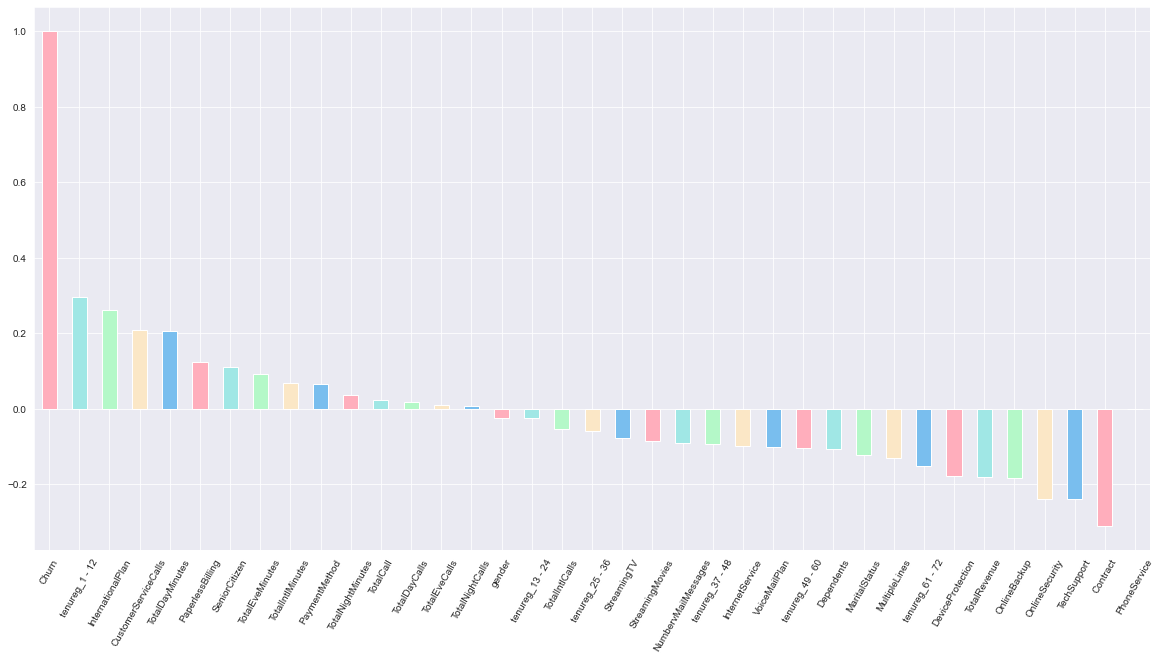

In [60]:
plt.figure(1 , figsize = (20,10))
sns.set_style('darkgrid') 
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color=['#FFAEBC','#A0E7E5', '#B4F8C8', '#FBE7C6', '#79BEEE'])
plt.xticks(rotation=60)

In [61]:
correlation_matrix = data.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5]),
 [Text(0.5, 0, 'gender'),
  Text(1.5, 0, 'SeniorCitizen'),
  Text(2.5, 0, 'MaritalStatus'),
  Text(3.5, 0, 'Dependents'),
  Text(4.5, 0, 'PhoneService'),
  Text(5.5, 0, 'MultipleLines'),
  Text(6.5, 0, 'InternetService'),
  Text(7.5, 0, 'OnlineSecurity'),
  Text(8.5, 0, 'OnlineBackup'),
  Text(9.5, 0, 'DeviceProtection'),
  Text(10.5, 0, 'TechSupport'),
  Text(11.5, 0, 'StreamingTV'),
  Text(12.5, 0, 'StreamingMovies'),
  Text(13.5, 0, 'Contract'),
  Text(14.5, 0, 'PaperlessBilling'),
  Text(15.5, 0, 'PaymentMethod'),
  Text(16.5, 0, 'InternationalPlan'),
  Text(17.5, 0, 'VoiceMailPlan'),
  Text(18.5, 0, 'NumbervMailMessages'),
  Text(19.5, 0, 'TotalDayMinutes'),
  Text(20.5, 0, 'TotalDayCalls'),
  Text(21.5, 0, 'TotalEveMinutes'),
  

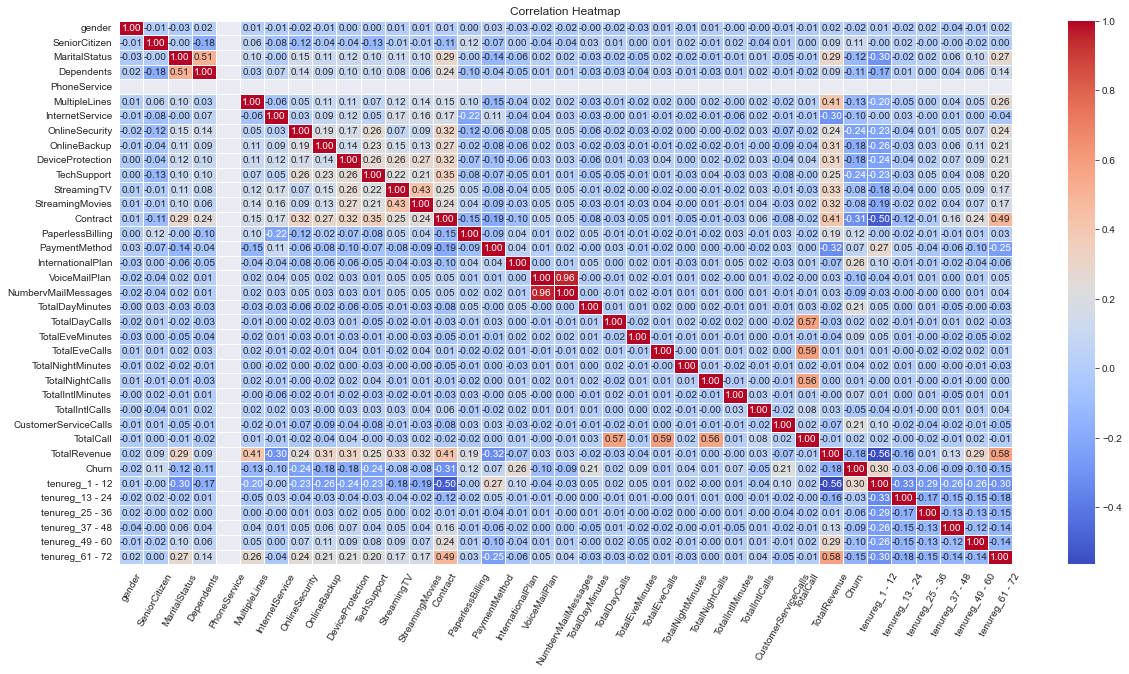

In [62]:
plt.figure(figsize=(20, 10)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.xticks(rotation=60)

In [63]:
data.head()

,gender,SeniorCitizen,MaritalStatus,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,CustomerServiceCalls,TotalCall,TotalRevenue,Churn,tenureg_1 - 12,tenureg_13 - 24,tenureg_25 - 36,tenureg_37 - 48,tenureg_49 - 60,tenureg_61 - 72
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,0,0,0,0,2,0,...,0,354,593.30,0,1,0,0,0,0,0
0004-TLHLJ,1,0,0,0,0,0,1,0,0,2,...,5,326,280.85,1,1,0,0,0,0,0
0013-MHZWF,0,0,0,1,0,0,0,0,0,0,...,2,324,571.45,0,1,0,0,0,0,0
0013-SMEOE,0,1,1,0,0,0,1,2,2,2,...,0,228,7904.25,0,0,0,0,0,0,1
0015-UOCOJ,0,1,0,0,0,0,0,2,0,0,...,1,294,340.35,0,1,0,0,0,0,0


<a name = "Splitting"></a>
## 6.Splitting the Data

In [64]:
x=data.drop('Churn',axis=1)
x

,gender,SeniorCitizen,MaritalStatus,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalRevenue,tenureg_1 - 12,tenureg_13 - 24,tenureg_25 - 36,tenureg_37 - 48,tenureg_49 - 60,tenureg_61 - 72
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,0,0,0,0,2,0,...,4,0,354,593.30,1,0,0,0,0,0
0004-TLHLJ,1,0,0,0,0,0,1,0,0,2,...,9,5,326,280.85,1,0,0,0,0,0
0013-MHZWF,0,0,0,1,0,0,0,0,0,0,...,4,2,324,571.45,1,0,0,0,0,0
0013-SMEOE,0,1,1,0,0,0,1,2,2,2,...,4,0,228,7904.25,0,0,0,0,0,1
0015-UOCOJ,0,1,0,0,0,0,0,2,0,0,...,2,1,294,340.35,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979-RGMZT,0,0,0,0,0,0,1,0,2,0,...,2,1,296,633.45,1,0,0,0,0,0
9986-BONCE,0,0,0,0,0,0,2,1,1,1,...,3,4,264,85.50,1,0,0,0,0,0
9987-LUTYD,0,0,0,0,0,0,0,2,0,0,...,6,1,349,742.90,0,1,0,0,0,0


In [65]:
y=data['Churn']
y

customerID
0002-ORFBO    0
0004-TLHLJ    1
0013-MHZWF    0
0013-SMEOE    0
0015-UOCOJ    0
             ..
9979-RGMZT    0
9986-BONCE    1
9987-LUTYD    0
9992-UJOEL    0
9993-LHIEB    0
Name: Churn, Length: 3328, dtype: int32

In [66]:
data["Churn"].value_counts()

0    2845
1     483
Name: Churn, dtype: int64

In [67]:
100 * data["Churn"].value_counts()/len(data["Churn"])

0    85.486779
1    14.513221
Name: Churn, dtype: float64

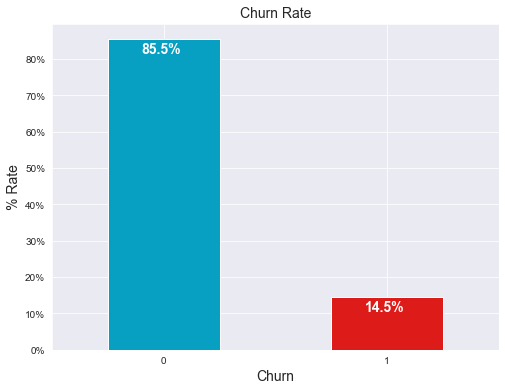

In [68]:
def Churn_rate(y):
    colors = ['#07a0c3', '#DD1C1A']
    ax = (y.value_counts(normalize=True)*100).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('% Rate',size = 14)
    ax.set_xlabel('Churn',size = 14)
    ax.set_title('Churn Rate', size = 14)

    for i in ax.patches:
        ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()), 1))+'%',
            color='white',
            weight = 'bold',
            size = 14)
Churn_rate(data['Churn'])

### We can see that the data is unbalanced so let's try SMOTEENN to handle it. 

In [69]:
sm=SMOTE(random_state=42)
xs,ys=sm.fit_resample(x,y)

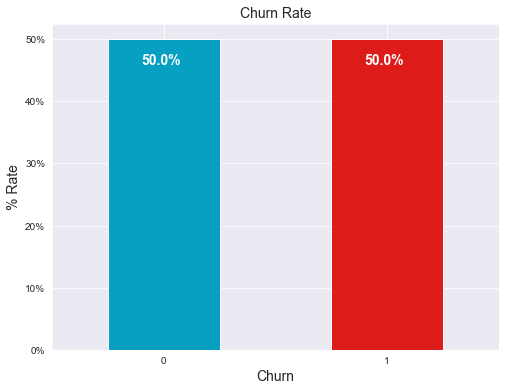

In [70]:
# Plot the churn rate
def Churn_rate(y):
    colors = ['#07a0c3', '#DD1C1A']
    ax = (y.value_counts(normalize=True) * 100).plot(kind='bar', stacked=True, rot=0, color=colors, figsize=(8, 6))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('% Rate', size=14)
    ax.set_xlabel('Churn', size=14)
    ax.set_title('Churn Rate', size=14)

    for i in ax.patches:
        ax.text(i.get_x() + .15, i.get_height() - 4.0, \
                str(round((i.get_height()), 1)) + '%',
                color='white',
                weight='bold',
                size=14)

# Call the Churn_rate function with the resampled target variable
Churn_rate(ys)


In [71]:
x_train, x_test, y_train, y_test = train_test_split(xs , ys , test_size=0.33, random_state=42)

<a name = "Model"></a>
## 7.Model training

### Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rfc = RandomForestClassifier(n_estimators=200,random_state=42,criterion='gini',max_depth=6,min_samples_leaf=8)
rfc.fit(x_train,y_train)
y_pred= rfc.predict(x_test)

In [73]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       959
           1       0.84      0.92      0.88       919

    accuracy                           0.88      1878
   macro avg       0.88      0.88      0.88      1878
weighted avg       0.88      0.88      0.88      1878



In [74]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)*100),"%")

Accuracy: 87.69968051118211 %


In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

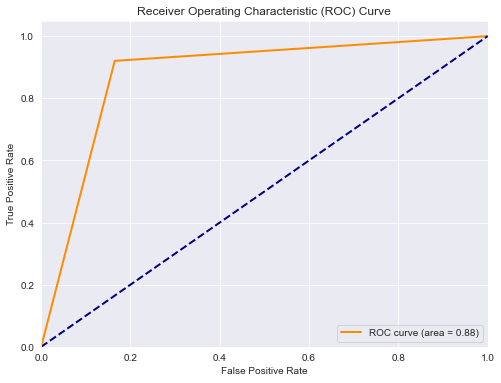

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
y_preed= dct.predict(x_test) 

In [78]:
print(classification_report(y_test, y_preed))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       959
           1       0.88      0.90      0.89       919

    accuracy                           0.89      1878
   macro avg       0.89      0.89      0.89      1878
weighted avg       0.89      0.89      0.89      1878



In [79]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_preed)*100),"%")

Accuracy: 89.29712460063898 %


In [80]:
f, t, thresholds = roc_curve(y_test, y_preed)
roc__auc = auc(f, t)

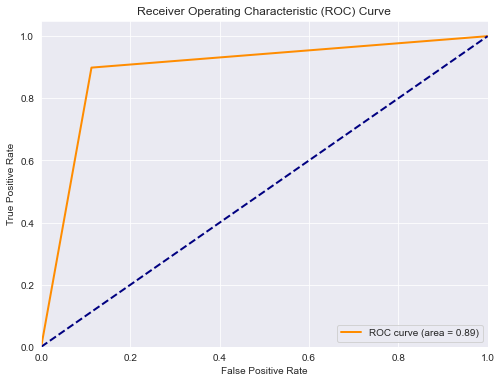

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(f, t, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc__auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Support Vector Classifier

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
clf = SVC(kernel='linear', C=1.0)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [83]:
print(classification_report(y_test,y_predict,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       959
           1       0.95      0.89      0.92       919

    accuracy                           0.92      1878
   macro avg       0.93      0.92      0.92      1878
weighted avg       0.93      0.92      0.92      1878



In [84]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict)*100),"%")

Accuracy: 92.38551650692226 %


In [85]:
fp, tp, thresholds = roc_curve(y_test, y_predict)
rocauc = auc(fp, tp)

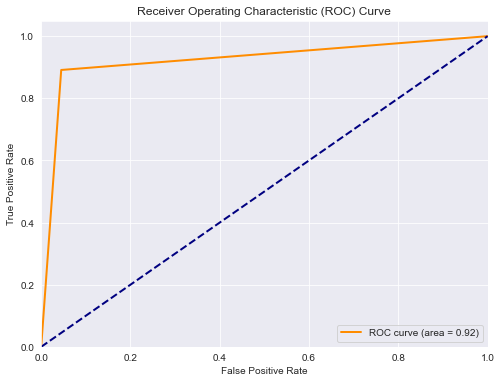

In [86]:
plt.figure(figsize=(8, 6))
plt.plot(fp, tp, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(rocauc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### CatBoost Classifier

In [87]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
cbc = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, verbose=200, random_state=42)
cbc.fit(x_train, y_train)
y_prred = cbc.predict(x_test)

0:	learn: 0.6073139	total: 157ms	remaining: 2m 37s
200:	learn: 0.0471225	total: 1.1s	remaining: 4.39s
400:	learn: 0.0152336	total: 2s	remaining: 2.99s
600:	learn: 0.0074209	total: 2.86s	remaining: 1.9s
800:	learn: 0.0055241	total: 3.66s	remaining: 909ms
999:	learn: 0.0047842	total: 4.42s	remaining: 0us


In [88]:
cbc.fit(x_train, y_train)
y_prred = cbc.predict(x_test)

0:	learn: 0.6073139	total: 4.57ms	remaining: 4.57s
200:	learn: 0.0471225	total: 954ms	remaining: 3.79s
400:	learn: 0.0152336	total: 1.82s	remaining: 2.72s
600:	learn: 0.0074209	total: 2.68s	remaining: 1.78s
800:	learn: 0.0055241	total: 3.52s	remaining: 874ms
999:	learn: 0.0047842	total: 4.3s	remaining: 0us


In [89]:
print(classification_report(y_test,y_prred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       959
           1       0.96      0.97      0.97       919

    accuracy                           0.97      1878
   macro avg       0.97      0.97      0.97      1878
weighted avg       0.97      0.97      0.97      1878



In [90]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_prred)*100),"%")

Accuracy: 96.6986155484558 %


In [91]:
fcbc, tcbc, thresholds = roc_curve(y_test, y_prred)
ro_cauc = auc(fcbc, tcbc)

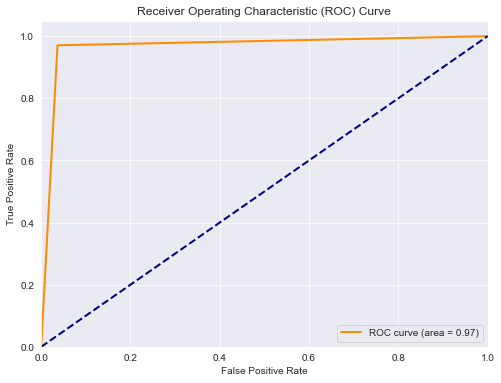

In [92]:
plt.figure(figsize=(8, 6))
plt.plot(fcbc, tcbc, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(ro_cauc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost Classifier

In [93]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42) 
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

In [94]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [95]:
y_pred_xgb = xgb.predict(x_test)

In [96]:
print(classification_report(y_test,y_pred_xgb,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       959
           1       0.95      0.97      0.96       919

    accuracy                           0.96      1878
   macro avg       0.96      0.96      0.96      1878
weighted avg       0.96      0.96      0.96      1878



In [97]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_xgb)*100),"%")

Accuracy: 96.27263045793397 %


In [98]:
fxgb, txgb, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fxgb, txgb)

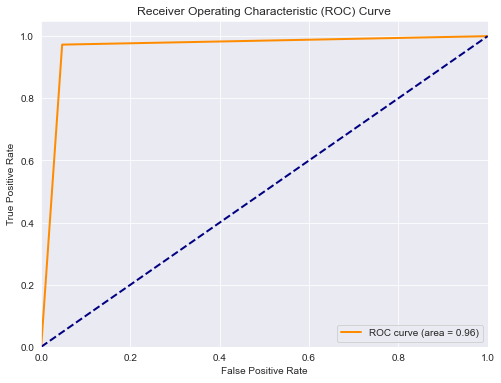

In [99]:
plt.figure(figsize=(8, 6))
plt.plot(fxgb, txgb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [100]:
model_scores = {
    'Random Forest Classifier': accuracy_score(y_test, y_pred)*100 ,
    'Decision Tree Classifier': accuracy_score(y_test, y_preed)*100 ,
    'Support Vector Classifier': accuracy_score(y_test, y_predict)*100 ,
    'CatBoost Classifier': accuracy_score(y_test, y_prred)*100 ,
    'XGBoost Classifier': accuracy_score(y_test, y_pred_xgb)*100 
}

In [101]:
scores_df = pd.DataFrame(model_scores.items(), columns=['Model', 'Accuracy'])
scores_df['Accuracy'] = scores_df['Accuracy'] 
best_model = scores_df[scores_df['Accuracy'] == scores_df['Accuracy'].max()]
print(scores_df)
print(f"The best model is {best_model['Model'].values[0]} with an accuracy of {best_model['Accuracy'].values[0]:.2f} %")

                       Model   Accuracy
0   Random Forest Classifier  87.699681
1   Decision Tree Classifier  89.297125
2  Support Vector Classifier  92.385517
3        CatBoost Classifier  96.698616
4         XGBoost Classifier  96.272630
The best model is CatBoost Classifier with an accuracy of 96.70 %


<a name = "Predictions"></a>
## 8.Test set predictions

#### Confusion Matrix

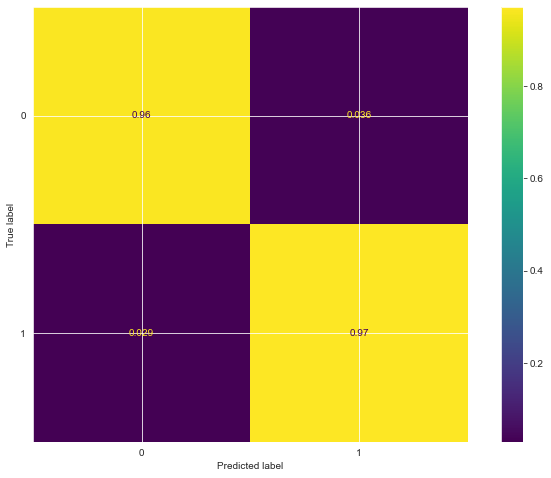

In [102]:
cm = confusion_matrix(y_test, y_prred, labels=cbc.classes_, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cbc.classes_)
fig, ax = plt.subplots(figsize=(12,8))
disp.plot(ax=ax)
plt.show()

### Feature Importances

In [103]:
print(cbc.feature_importances_)

[ 1.66782346  0.67366298  0.69672503  0.81175992  0.          1.10235554
  5.07903115  5.59500392  2.76774895  3.76853652  2.5893704   3.84159464
  3.24948559  4.05308128  0.66355703  2.30610931  2.18463393  5.08582012
  5.42860138 11.86401222  2.04512228  5.36802514  1.94840564  3.1928844
  2.18922934  3.84684894  3.55734468  5.22597992  1.94872142  5.47944926
  0.43677033  0.539009    0.43487366  0.05929524  0.05508575  0.24404167]


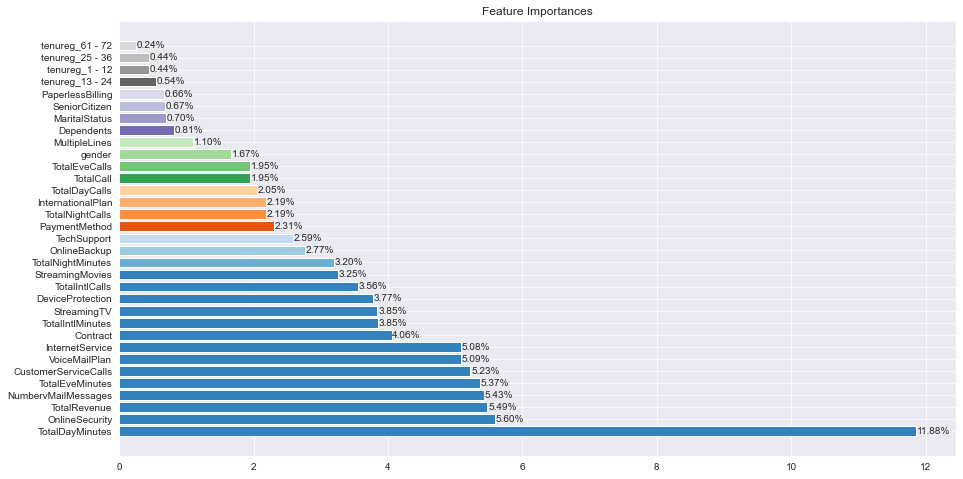

In [104]:
feature_importance = cbc.get_feature_importance(type='PredictionValuesChange')
feature_names = cbc.feature_names_
sorted_idx = feature_importance.argsort()
top_n = 33
total_importance = feature_importance[sorted_idx][-top_n:].sum()
cmap = plt.cm.get_cmap('tab20c_r')
plt.figure(figsize=(15, 8))
bars = plt.barh(range(top_n), feature_importance[sorted_idx][-top_n:], align='center', color=cmap(range(top_n)))
plt.yticks(range(top_n), [feature_names[i] for i in sorted_idx][-top_n:])
plt.title('Feature Importances')
plt.gca().invert_yaxis()
for bar in bars:
    percentage = (bar.get_width() / total_importance) * 100
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')

plt.show()

In [105]:
model = CatBoostClassifier(random_state=42)
model.fit(x_train, y_train)
feature_importances = model.feature_importances_

# Set a threshold for feature importance
threshold = 2.5

# Identify non-important features
non_important_features = x.columns[feature_importances <= threshold]

# Drop non-important features from the training and testing sets
x_train_selected = x_train.drop(columns=non_important_features)
x_test_selected = x_test.drop(columns=non_important_features)

# Train a new CatBoost Classifier model with the dropped features
model_selected = CatBoostClassifier(random_state=42)
model_selected.fit(x_train_selected, y_train)

# Evaluate the new model on the testing set
y_predict_cbc = model_selected.predict(x_test_selected)
accuracy = accuracy_score(y_test, y_predict_cbc)

Learning rate set to 0.018243
0:	learn: 0.6760665	total: 5.82ms	remaining: 5.82s
1:	learn: 0.6584341	total: 11.6ms	remaining: 5.79s
2:	learn: 0.6436107	total: 17.3ms	remaining: 5.75s
3:	learn: 0.6309124	total: 22.8ms	remaining: 5.68s
4:	learn: 0.6167695	total: 28.1ms	remaining: 5.59s
5:	learn: 0.6041992	total: 33.6ms	remaining: 5.57s
6:	learn: 0.5911712	total: 39.2ms	remaining: 5.56s
7:	learn: 0.5805765	total: 44.9ms	remaining: 5.57s
8:	learn: 0.5681565	total: 50.6ms	remaining: 5.57s
9:	learn: 0.5548625	total: 56.3ms	remaining: 5.58s
10:	learn: 0.5453580	total: 61.4ms	remaining: 5.52s
11:	learn: 0.5331887	total: 67.5ms	remaining: 5.55s
12:	learn: 0.5240844	total: 73.1ms	remaining: 5.55s
13:	learn: 0.5159667	total: 78.5ms	remaining: 5.53s
14:	learn: 0.5062214	total: 84.2ms	remaining: 5.53s
15:	learn: 0.4988268	total: 89.8ms	remaining: 5.52s
16:	learn: 0.4886940	total: 94.8ms	remaining: 5.48s
17:	learn: 0.4816453	total: 100ms	remaining: 5.46s
18:	learn: 0.4743914	total: 104ms	remaining: 

193:	learn: 0.1898966	total: 904ms	remaining: 3.76s
194:	learn: 0.1891770	total: 909ms	remaining: 3.75s
195:	learn: 0.1885133	total: 914ms	remaining: 3.75s
196:	learn: 0.1881386	total: 918ms	remaining: 3.74s
197:	learn: 0.1877087	total: 923ms	remaining: 3.74s
198:	learn: 0.1874580	total: 927ms	remaining: 3.73s
199:	learn: 0.1871348	total: 931ms	remaining: 3.73s
200:	learn: 0.1867570	total: 936ms	remaining: 3.72s
201:	learn: 0.1862143	total: 941ms	remaining: 3.72s
202:	learn: 0.1857767	total: 945ms	remaining: 3.71s
203:	learn: 0.1854609	total: 950ms	remaining: 3.71s
204:	learn: 0.1850152	total: 954ms	remaining: 3.7s
205:	learn: 0.1847866	total: 959ms	remaining: 3.69s
206:	learn: 0.1844994	total: 963ms	remaining: 3.69s
207:	learn: 0.1839483	total: 968ms	remaining: 3.68s
208:	learn: 0.1832365	total: 972ms	remaining: 3.68s
209:	learn: 0.1828533	total: 977ms	remaining: 3.67s
210:	learn: 0.1824919	total: 982ms	remaining: 3.67s
211:	learn: 0.1820237	total: 986ms	remaining: 3.66s
212:	learn: 0

390:	learn: 0.1317532	total: 1.8s	remaining: 2.81s
391:	learn: 0.1316224	total: 1.81s	remaining: 2.8s
392:	learn: 0.1313557	total: 1.81s	remaining: 2.8s
393:	learn: 0.1311568	total: 1.82s	remaining: 2.79s
394:	learn: 0.1309866	total: 1.82s	remaining: 2.79s
395:	learn: 0.1307648	total: 1.82s	remaining: 2.78s
396:	learn: 0.1305999	total: 1.83s	remaining: 2.78s
397:	learn: 0.1304058	total: 1.83s	remaining: 2.77s
398:	learn: 0.1301689	total: 1.84s	remaining: 2.77s
399:	learn: 0.1299637	total: 1.84s	remaining: 2.76s
400:	learn: 0.1295851	total: 1.85s	remaining: 2.76s
401:	learn: 0.1294267	total: 1.85s	remaining: 2.75s
402:	learn: 0.1292688	total: 1.86s	remaining: 2.75s
403:	learn: 0.1291102	total: 1.86s	remaining: 2.74s
404:	learn: 0.1289827	total: 1.86s	remaining: 2.74s
405:	learn: 0.1287079	total: 1.87s	remaining: 2.73s
406:	learn: 0.1284363	total: 1.87s	remaining: 2.73s
407:	learn: 0.1283004	total: 1.88s	remaining: 2.73s
408:	learn: 0.1280915	total: 1.88s	remaining: 2.72s
409:	learn: 0.1

583:	learn: 0.0970595	total: 2.7s	remaining: 1.92s
584:	learn: 0.0969712	total: 2.7s	remaining: 1.92s
585:	learn: 0.0968498	total: 2.71s	remaining: 1.91s
586:	learn: 0.0967101	total: 2.71s	remaining: 1.91s
587:	learn: 0.0966264	total: 2.71s	remaining: 1.9s
588:	learn: 0.0965764	total: 2.72s	remaining: 1.9s
589:	learn: 0.0963762	total: 2.72s	remaining: 1.89s
590:	learn: 0.0962567	total: 2.73s	remaining: 1.89s
591:	learn: 0.0961090	total: 2.73s	remaining: 1.88s
592:	learn: 0.0960267	total: 2.74s	remaining: 1.88s
593:	learn: 0.0958686	total: 2.74s	remaining: 1.87s
594:	learn: 0.0956475	total: 2.75s	remaining: 1.87s
595:	learn: 0.0954479	total: 2.75s	remaining: 1.86s
596:	learn: 0.0953508	total: 2.75s	remaining: 1.86s
597:	learn: 0.0951148	total: 2.76s	remaining: 1.85s
598:	learn: 0.0949257	total: 2.76s	remaining: 1.85s
599:	learn: 0.0947803	total: 2.77s	remaining: 1.85s
600:	learn: 0.0947229	total: 2.77s	remaining: 1.84s
601:	learn: 0.0945838	total: 2.78s	remaining: 1.84s
602:	learn: 0.09

777:	learn: 0.0734187	total: 3.6s	remaining: 1.03s
778:	learn: 0.0732366	total: 3.6s	remaining: 1.02s
779:	learn: 0.0731325	total: 3.61s	remaining: 1.02s
780:	learn: 0.0730677	total: 3.61s	remaining: 1.01s
781:	learn: 0.0729004	total: 3.61s	remaining: 1.01s
782:	learn: 0.0728124	total: 3.62s	remaining: 1s
783:	learn: 0.0726983	total: 3.62s	remaining: 998ms
784:	learn: 0.0725810	total: 3.63s	remaining: 994ms
785:	learn: 0.0725005	total: 3.63s	remaining: 989ms
786:	learn: 0.0724047	total: 3.64s	remaining: 984ms
787:	learn: 0.0723118	total: 3.64s	remaining: 980ms
788:	learn: 0.0721635	total: 3.65s	remaining: 975ms
789:	learn: 0.0720256	total: 3.65s	remaining: 970ms
790:	learn: 0.0719592	total: 3.65s	remaining: 965ms
791:	learn: 0.0718946	total: 3.66s	remaining: 961ms
792:	learn: 0.0718138	total: 3.66s	remaining: 956ms
793:	learn: 0.0717549	total: 3.67s	remaining: 951ms
794:	learn: 0.0716222	total: 3.67s	remaining: 947ms
795:	learn: 0.0715458	total: 3.67s	remaining: 942ms
796:	learn: 0.071

975:	learn: 0.0553144	total: 4.49s	remaining: 110ms
976:	learn: 0.0552685	total: 4.5s	remaining: 106ms
977:	learn: 0.0551535	total: 4.5s	remaining: 101ms
978:	learn: 0.0550506	total: 4.5s	remaining: 96.6ms
979:	learn: 0.0549943	total: 4.51s	remaining: 92ms
980:	learn: 0.0548925	total: 4.51s	remaining: 87.4ms
981:	learn: 0.0548488	total: 4.52s	remaining: 82.8ms
982:	learn: 0.0547485	total: 4.52s	remaining: 78.2ms
983:	learn: 0.0546464	total: 4.53s	remaining: 73.6ms
984:	learn: 0.0545359	total: 4.53s	remaining: 69ms
985:	learn: 0.0544609	total: 4.54s	remaining: 64.4ms
986:	learn: 0.0544225	total: 4.54s	remaining: 59.8ms
987:	learn: 0.0543312	total: 4.54s	remaining: 55.2ms
988:	learn: 0.0542671	total: 4.55s	remaining: 50.6ms
989:	learn: 0.0541487	total: 4.55s	remaining: 46ms
990:	learn: 0.0540511	total: 4.56s	remaining: 41.4ms
991:	learn: 0.0539605	total: 4.56s	remaining: 36.8ms
992:	learn: 0.0539081	total: 4.57s	remaining: 32.2ms
993:	learn: 0.0538174	total: 4.57s	remaining: 27.6ms
994:	

156:	learn: 0.2081293	total: 563ms	remaining: 3.02s
157:	learn: 0.2074235	total: 567ms	remaining: 3.02s
158:	learn: 0.2066812	total: 571ms	remaining: 3.02s
159:	learn: 0.2057698	total: 574ms	remaining: 3.01s
160:	learn: 0.2052744	total: 578ms	remaining: 3.01s
161:	learn: 0.2049166	total: 582ms	remaining: 3.01s
162:	learn: 0.2044773	total: 586ms	remaining: 3.01s
163:	learn: 0.2037133	total: 590ms	remaining: 3s
164:	learn: 0.2032816	total: 593ms	remaining: 3s
165:	learn: 0.2027727	total: 597ms	remaining: 3s
166:	learn: 0.2018020	total: 602ms	remaining: 3s
167:	learn: 0.2013596	total: 606ms	remaining: 3s
168:	learn: 0.2009823	total: 610ms	remaining: 3s
169:	learn: 0.2005824	total: 614ms	remaining: 3s
170:	learn: 0.2001681	total: 619ms	remaining: 3s
171:	learn: 0.1997059	total: 623ms	remaining: 3s
172:	learn: 0.1993138	total: 628ms	remaining: 3s
173:	learn: 0.1987482	total: 632ms	remaining: 3s
174:	learn: 0.1979963	total: 636ms	remaining: 3s
175:	learn: 0.1975103	total: 640ms	remaining: 3s

339:	learn: 0.1417422	total: 1.27s	remaining: 2.48s
340:	learn: 0.1414566	total: 1.28s	remaining: 2.47s
341:	learn: 0.1412541	total: 1.28s	remaining: 2.47s
342:	learn: 0.1409780	total: 1.29s	remaining: 2.46s
343:	learn: 0.1407272	total: 1.29s	remaining: 2.46s
344:	learn: 0.1405157	total: 1.29s	remaining: 2.46s
345:	learn: 0.1404004	total: 1.3s	remaining: 2.45s
346:	learn: 0.1401791	total: 1.3s	remaining: 2.45s
347:	learn: 0.1399113	total: 1.31s	remaining: 2.45s
348:	learn: 0.1396320	total: 1.31s	remaining: 2.44s
349:	learn: 0.1394311	total: 1.31s	remaining: 2.44s
350:	learn: 0.1391671	total: 1.32s	remaining: 2.44s
351:	learn: 0.1389999	total: 1.32s	remaining: 2.43s
352:	learn: 0.1387390	total: 1.32s	remaining: 2.43s
353:	learn: 0.1385931	total: 1.33s	remaining: 2.42s
354:	learn: 0.1384858	total: 1.33s	remaining: 2.42s
355:	learn: 0.1383268	total: 1.34s	remaining: 2.42s
356:	learn: 0.1381932	total: 1.34s	remaining: 2.42s
357:	learn: 0.1380139	total: 1.34s	remaining: 2.41s
358:	learn: 0.

529:	learn: 0.1079554	total: 1.99s	remaining: 1.76s
530:	learn: 0.1078336	total: 1.99s	remaining: 1.76s
531:	learn: 0.1076636	total: 2s	remaining: 1.75s
532:	learn: 0.1075561	total: 2s	remaining: 1.75s
533:	learn: 0.1074020	total: 2s	remaining: 1.75s
534:	learn: 0.1073170	total: 2.01s	remaining: 1.74s
535:	learn: 0.1072111	total: 2.01s	remaining: 1.74s
536:	learn: 0.1070972	total: 2.01s	remaining: 1.74s
537:	learn: 0.1069590	total: 2.02s	remaining: 1.73s
538:	learn: 0.1068564	total: 2.02s	remaining: 1.73s
539:	learn: 0.1066628	total: 2.02s	remaining: 1.73s
540:	learn: 0.1065303	total: 2.03s	remaining: 1.72s
541:	learn: 0.1064147	total: 2.03s	remaining: 1.72s
542:	learn: 0.1063045	total: 2.04s	remaining: 1.71s
543:	learn: 0.1061680	total: 2.04s	remaining: 1.71s
544:	learn: 0.1058884	total: 2.04s	remaining: 1.71s
545:	learn: 0.1056665	total: 2.05s	remaining: 1.7s
546:	learn: 0.1055690	total: 2.05s	remaining: 1.7s
547:	learn: 0.1053896	total: 2.05s	remaining: 1.69s
548:	learn: 0.1052870	t

726:	learn: 0.0839792	total: 2.7s	remaining: 1.01s
727:	learn: 0.0838892	total: 2.71s	remaining: 1.01s
728:	learn: 0.0838027	total: 2.71s	remaining: 1.01s
729:	learn: 0.0836871	total: 2.72s	remaining: 1s
730:	learn: 0.0836100	total: 2.72s	remaining: 1s
731:	learn: 0.0834615	total: 2.72s	remaining: 998ms
732:	learn: 0.0833106	total: 2.73s	remaining: 994ms
733:	learn: 0.0832397	total: 2.73s	remaining: 990ms
734:	learn: 0.0831003	total: 2.74s	remaining: 987ms
735:	learn: 0.0829362	total: 2.74s	remaining: 983ms
736:	learn: 0.0828104	total: 2.74s	remaining: 979ms
737:	learn: 0.0826657	total: 2.75s	remaining: 976ms
738:	learn: 0.0826132	total: 2.75s	remaining: 972ms
739:	learn: 0.0823696	total: 2.75s	remaining: 968ms
740:	learn: 0.0822667	total: 2.76s	remaining: 964ms
741:	learn: 0.0822052	total: 2.76s	remaining: 961ms
742:	learn: 0.0820678	total: 2.77s	remaining: 957ms
743:	learn: 0.0819565	total: 2.77s	remaining: 954ms
744:	learn: 0.0818844	total: 2.77s	remaining: 950ms
745:	learn: 0.08172

915:	learn: 0.0673667	total: 3.42s	remaining: 313ms
916:	learn: 0.0672893	total: 3.42s	remaining: 310ms
917:	learn: 0.0672160	total: 3.42s	remaining: 306ms
918:	learn: 0.0671344	total: 3.43s	remaining: 302ms
919:	learn: 0.0670893	total: 3.43s	remaining: 298ms
920:	learn: 0.0669959	total: 3.43s	remaining: 295ms
921:	learn: 0.0669334	total: 3.44s	remaining: 291ms
922:	learn: 0.0668096	total: 3.44s	remaining: 287ms
923:	learn: 0.0666911	total: 3.45s	remaining: 284ms
924:	learn: 0.0665973	total: 3.45s	remaining: 280ms
925:	learn: 0.0665241	total: 3.46s	remaining: 276ms
926:	learn: 0.0664457	total: 3.46s	remaining: 273ms
927:	learn: 0.0663257	total: 3.46s	remaining: 269ms
928:	learn: 0.0662959	total: 3.47s	remaining: 265ms
929:	learn: 0.0662495	total: 3.47s	remaining: 261ms
930:	learn: 0.0661911	total: 3.48s	remaining: 258ms
931:	learn: 0.0661419	total: 3.48s	remaining: 254ms
932:	learn: 0.0660986	total: 3.48s	remaining: 250ms
933:	learn: 0.0660192	total: 3.49s	remaining: 246ms
934:	learn: 

In [106]:
print(f"Accuracy with selected features: {accuracy}")

Accuracy with selected features: 0.9563365282215123


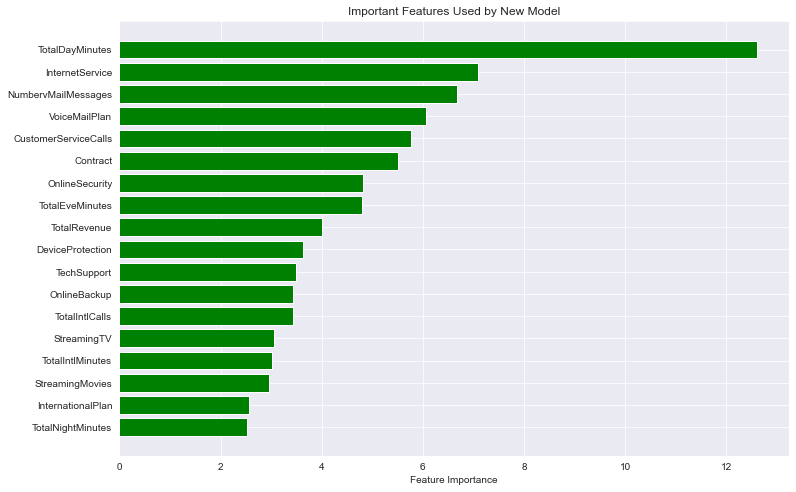

In [107]:
sorted_features = [feature for _, feature in sorted(zip(feature_importances, x.columns), reverse=True)]
sorted_importances = sorted(feature_importances, reverse=True)

threshold = 2.5  

important_features = [feature for feature, importance in zip(sorted_features, sorted_importances) if importance >= threshold]
important_importances = [importance for importance in sorted_importances if importance >= threshold]

plt.figure(figsize=(12, 8))
plt.barh(important_features, important_importances, color='green')
plt.xlabel('Feature Importance')
plt.title('Important Features Used by New Model')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


## Grid Search CV

In [109]:
catboost_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
}
cbc = CatBoostClassifier(random_state=42, verbose=0)
catboost_grid_search = GridSearchCV(
    cbc,
    param_grid=catboost_param_grid,
    scoring='accuracy', 
    cv=5,
    verbose=2, 
    n_jobs=-1,  
)
catboost_grid_search.fit(x_train, y_train)
best_catboost_params = catboost_grid_search.best_params_
best_catboost_estimator = catboost_grid_search.best_estimator_
print("CatBoost Best Parameters:", best_catboost_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CatBoost Best Parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.2}


In [110]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_prred)*100),"%")

Accuracy: 96.6986155484558 %


## Cross Validation

In [111]:
catboost_classifier = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.2,
    random_state=42,
    verbose=0 
)
cross_val_scores = cross_val_score(
    catboost_classifier, 
    xs,  
    ys, 
    cv=5,
    scoring='accuracy',  
    n_jobs=-1 
)
print("Cross-Validation Scores:", cross_val_scores)
mean_score = cross_val_scores.mean() * 100
std_score = cross_val_scores.std() * 100
print(f"Mean Accuracy: {mean_score:.2f}")

Cross-Validation Scores: [0.81634446 0.96572935 0.9771529  0.97891037 0.97188049]
Mean Accuracy: 94.20


### This indicates that the CatBoost Classifier Model is performing well and is not suffering from significant overfitting.